In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [44]:
df = pd.read_csv('/home/billys/Downloads/ab_test_dataset.csv')

In [45]:
n_A = df[df['Variant'] == 'A'].shape[0]
n_B = df[df['Variant'] == 'B'].shape[0]

In [46]:
# Data for A/B test
conversions_A = df[df['Variant'] == 'A']['Conversion'].sum()
conversions_B = df[df['Variant'] == 'B']['Conversion'].sum()
nobs = np.array([n_A, n_B])

In [47]:
# Statistical analysis
stat, pval = proportions_ztest([conversions_A, conversions_B], nobs)

In [48]:
# Confidence intervals
confint_A = proportion_confint(conversions_A, nobs[0], alpha=0.05)
confint_B = proportion_confint(conversions_B, nobs[1], alpha=0.05)

(stat, pval, confint_A, confint_B)

(-2.121848679514367,
 0.03385044725682744,
 (0.033016218621397656, 0.05898378137860234),
 (0.05239691395203145, 0.08360308604796857))

In [49]:
print(f"Confidence Interval for A: {confint_A}")
print(f"Confidence Interval for B: {confint_B}")

Confidence Interval for A: (0.033016218621397656, 0.05898378137860234)
Confidence Interval for B: (0.05239691395203145, 0.08360308604796857)


# Visualization

In [60]:
# Calculate the percentage of users who converted for each variant
conversion_rates = df.groupby('Variant')['Conversion'].value_counts(normalize=True).unstack() * 100
conversion_rates.columns = ['Converted','Did Not Convert']  # Rename columns for clarity

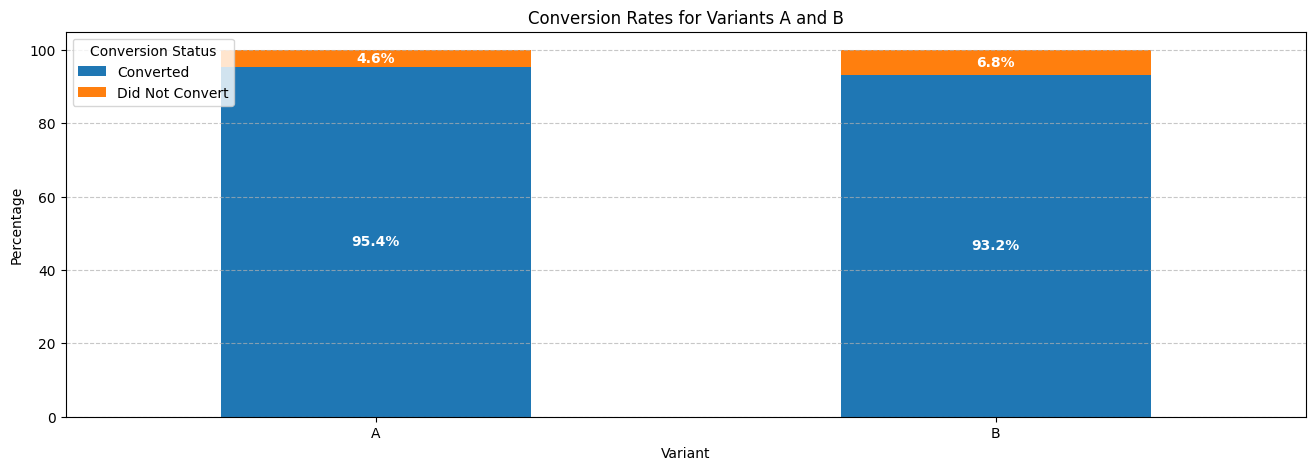

In [79]:
# Plotting
conversion_rates[['Converted', 'Did Not Convert']].plot(kind='bar', stacked=True, figsize=(16, 5), color=[ '#1f77b4', '#ff7f0e'])
plt.title('Conversion Rates for Variants A and B')
plt.xlabel('Variant')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Conversion Status', loc='upper left', labels=['Converted', 'Did Not Convert'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding annotations for values
for index, (converted, did_not_convert) in enumerate(zip(conversion_rates['Converted'], conversion_rates['Did Not Convert'])):
    plt.text(index, converted/2, f"{converted:.1f}%", ha='center', va='center', color='white', weight='bold')
    plt.text(index, converted + did_not_convert/2, f"{did_not_convert:.1f}%", ha='center', va='center', color='white', weight='bold')

plt.show()